# Preprocesamiento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("C:/Users/vesga/OneDrive - Universidad del Norte/Escritorio/Maestria/MachineLearningUN/data_treino_dv_df_2000_2010.csv")

In [3]:
data.columns=['HORA','Direccion','Velocidad','Humedad MX', 'Humedad MN', 'Temp MX', 'Temp MN', 'Humedad relativa', 'Presion atmosferica','Precipitacion','MX vel','Presion MX','Presion MN']

In [4]:
data

HORA  Direccion  Velocidad  Humedad MX  Humedad MN  Temp MX  Temp MN  \
0      12:00   0.809017        1.8        69.0        60.0     22.6     20.7   
1      13:00   0.965926        2.7        62.0        55.0     24.2     22.5   
2      14:00   0.891007        2.0        56.0        50.0     25.5     24.3   
3      15:00   0.848048        2.5        52.0        44.0     27.4     25.0   
4      16:00   0.224951        2.4        50.0        43.0     27.1     25.5   
...      ...        ...        ...         ...         ...      ...      ...   
87688  19:00  -0.615661        5.6        83.0        78.0     21.8     21.1   
87689  20:00  -0.469472        4.9        84.0        79.0     21.7     21.0   
87690  21:00  -0.484810        4.5        86.0        82.0     21.2     20.6   
87691  22:00  -0.484810        3.2        88.0        85.0     20.6     20.2   
87692  23:00  -0.573576        2.3        95.0        88.0     20.2     19.3   

       Humedad relativa  Presion atmosferica  Precipitacion  MX vel  \
0                  61.0                888.2            0.0     3.8   
1                  55.0                888.4            0.0     4.7   
2                  51.0                888.1            0.0     4.9   
3                  44.0                887.4            0.0     5.8   
4                  46.0                886.5            0.0     5.8   
...                 ...                  ...            ...     ...   
87688              80.0                879.1            0.0    12.3   
87689              84.0                879.2            0.0     9.9   
87690              86.0                879.7            0.0     8.9   
87691              88.0                880.5            0.0     8.0   
87692              95.0                881.1            0.6     7.5   

       Presion MX  Presion MN  
0           888.2       887.7  
1           888.4       888.2  
2           888.4       888.1  
3           888.1       887.4  
4           887.4       886.5  
...           ...         ...  
87688       879.8       879.1  
87689       879.2       878.9  
87690       879.8       879.2  
87691       880.5       879.6  
87692       881.1       880.5  

[87693 rows x 13 columns]

## Analisis de descomposicion

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame de ejemplo con columna 'HORA' en formato militar
# Asegúrate de que la columna 'HORA' tiene valores como '23:50', '00:05:00', etc.
# data = pd.DataFrame({'HORA': ['23:50:00', '23:55:00', '00:05:00', '01:00:00', '23:45:00', '00:15:00', '01:30:00'], 
#                     'Velocidad': [12, 15, 18, 10, 20, 16, 14]})

# Convertir la columna de 'HORA' a formato datetime (aceptando horas con o sin segundos)
data['HORA'] = pd.to_datetime(data['HORA'], format='%H:%M', errors='coerce').dt.time

# Inicializamos la primera fecha
fecha_base = pd.Timestamp('2000-01-01')

# Lista para almacenar las fechas
fechas = [fecha_base]

# Iteramos sobre las filas del DataFrame para detectar cambios de día
for i in range(1, len(data)):
    # Comparamos la hora actual con la anterior
    if data['HORA'].iloc[i] < data['HORA'].iloc[i - 1]:
        # Si la hora actual es menor, significa que es un nuevo día
        fecha_base += pd.Timedelta(days=1)
    
    # Agregar la nueva fecha
    fechas.append(fecha_base)

# Agregar la nueva columna de fecha completa al DataFrame
data['Fecha Completa'] = [pd.Timestamp.combine(f, h) for f, h in zip(fechas, data['HORA'])]

# Graficar la serie de tiempo
# Crear la gráfica interactiva con Plotly
fig = px.line(data, x='Fecha Completa', y='Velocidad', title='Serie de Tiempo: Velocidad del Viento')

# Mostrar la gráfica interactiva
fig.show()

In [20]:
# Filtrar solo los últimos 30 datos
ultimos_30_datos = data.tail(1000)

# Crear la gráfica interactiva con Plotly solo con los últimos 30 datos
fig = px.line(ultimos_30_datos, x='Fecha Completa', y='Velocidad', title='Últimos 30 Datos: Velocidad del Viento')

# Mostrar la gráfica interactiva
fig.show()

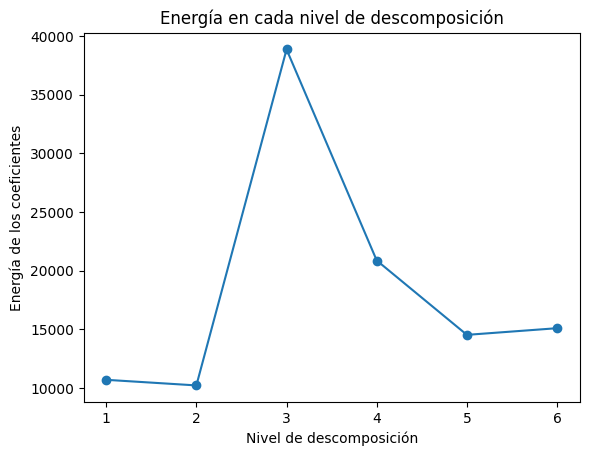

In [28]:
import pywt
import numpy as np

# Suponiendo que tienes una serie de tiempo 'data'
data_wave = data['Velocidad']

# Aplicar MODWT/DWT (usamos 'db4' como ejemplo de Wavelet)
wavelet = pywt.Wavelet('db4')

# Descomposición hasta un nivel 16
coeffs = pywt.wavedec(data_wave, wavelet, level=6)

# Calcular la energía de los coeficientes de detalle
energy_levels = [np.sum(np.square(c)) for c in coeffs[1:]]

# Graficar la energía para cada nivel
import matplotlib.pyplot as plt
plt.plot(range(1, len(energy_levels) + 1), energy_levels, 'o-')
plt.xlabel('Nivel de descomposición')
plt.ylabel('Energía de los coeficientes')
plt.title('Energía en cada nivel de descomposición')
plt.show()


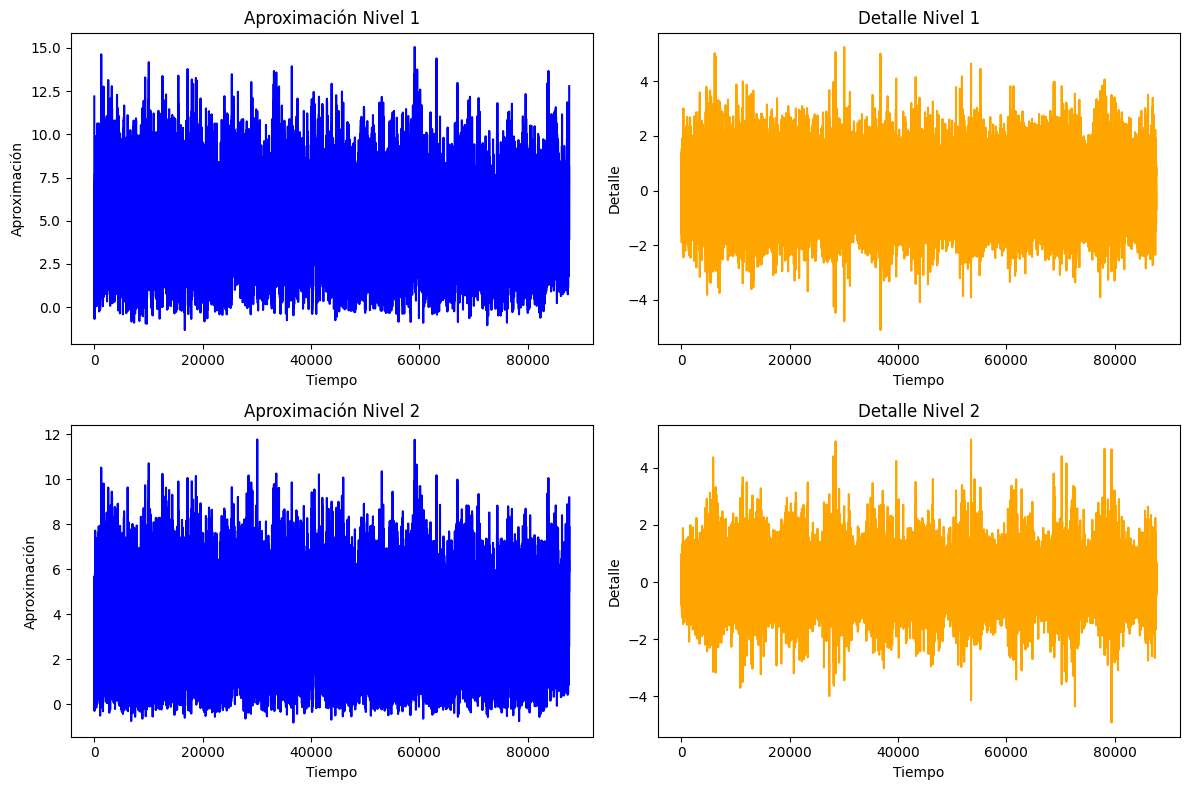

In [44]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import random

# Establecer las semillas para la replicabilidad
def set_seeds(seed=42):
    np.random.seed(seed)
    random.seed(seed)

set_seeds(42)

# Suponiendo que ya tienes los datos en 'data' con la columna 'Velocidad'
# Recortar el primer valor (el más antiguo) para que la longitud sea par
if len(data) % 2 != 0:
    data = data.iloc[1:]  # Recortar el primer valor

# Aplicar MODWT (Maximal Overlap Discrete Wavelet Transform) con 'db4' usando solo 2 niveles
wavelet = 'db4'
nivel_maximo = 2  # Usamos solo 2 niveles
coeffs = pywt.swt(data['Velocidad'], wavelet, level=nivel_maximo)

# Graficar la aproximación y los detalles para los dos niveles
fig, axs = plt.subplots(nivel_maximo, 2, figsize=(12, 8))

# Iterar sobre los niveles de descomposición
for i, (approx, detail) in enumerate(coeffs):
    # Graficar la aproximación del nivel
    axs[i, 0].plot(approx, color='blue')
    axs[i, 0].set_title(f'Aproximación Nivel {i+1}')
    axs[i, 0].set_xlabel('Tiempo')
    axs[i, 0].set_ylabel('Aproximación')
    
    # Graficar el detalle del nivel
    axs[i, 1].plot(detail, color='orange')
    axs[i, 1].set_title(f'Detalle Nivel {i+1}')
    axs[i, 1].set_xlabel('Tiempo')
    axs[i, 1].set_ylabel('Detalle')

# Ajustar el layout para que no se superpongan las gráficas
plt.tight_layout()
plt.show()


Se decide no hacer descomposicion debido a la difucultdad de integrarlo con variables exogenas

## Feature selection

In [46]:
# Convertir la columna 'Fecha' en el índice del DataFrame
data.set_index('Fecha Completa', inplace=True)

# Verifica que la variable de tiempo sea ahora el índice
print(data.head())


                         HORA  Direccion  Velocidad  Humedad MX  Humedad MN  \
Fecha Completa                                                                
2000-01-01 13:00:00  13:00:00   0.965926        2.7        62.0        55.0   
2000-01-01 14:00:00  14:00:00   0.891007        2.0        56.0        50.0   
2000-01-01 15:00:00  15:00:00   0.848048        2.5        52.0        44.0   
2000-01-01 16:00:00  16:00:00   0.224951        2.4        50.0        43.0   
2000-01-01 17:00:00  17:00:00   0.034899        1.8        48.0        41.0   

                     Temp MX  Temp MN  Humedad relativa  Presion atmosferica  \
Fecha Completa                                                                 
2000-01-01 13:00:00     24.2     22.5              55.0                888.4   
2000-01-01 14:00:00     25.5     24.3              51.0                888.1   
2000-01-01 15:00:00     27.4     25.0              44.0                887.4   
2000-01-01 16:00:00     27.1     25.5         

In [18]:
Y = data['Velocidad']
X = data.drop(columns="Velocidad")
X = X.drop(columns="HORA")
X = X.drop(columns="MX vel")
X = X.drop(columns="Fecha Completa")

Probamos Mutual Info regression y nos deja una sola variable

In [20]:
from sklearn.feature_selection import mutual_info_regression

# Calcular MI entre cada variable de X y Y
mi_scores = mutual_info_regression(X, Y)

# Seleccionar las variables con MI superior a un umbral
threshold = 0.1  # Ajustar el threshold según los resultados
selected_features = X.columns[mi_scores > threshold]

# Filtrar X solo con las variables seleccionadas
X_filtered = X[selected_features]


In [21]:
# Calcular la matriz de correlación entre las variables seleccionadas
corr_matrix = X_filtered.corr().abs()

# Definir un umbral de correlación para eliminar variables altamente correlacionadas
corr_threshold = 0.9  # Ajustar según sea necesario

# Identificar pares de variables con alta correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]

# Eliminar las variables con alta colinealidad
X_filtered_no_collinearity = X_filtered.drop(columns=to_drop)

print(f"Variables seleccionadas después de eliminar colinealidad: {X_filtered_no_collinearity.columns}")


Variables seleccionadas después de eliminar colinealidad: Index(['Direccion'], dtype='object')


Al probar la tecnica VIF nos quedamos con 4 variables

In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Agregar constante para el VIF
X['intercept'] = 1

# Calcular el VIF para cada variable
vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


              Variables           VIF
0             Direccion      1.295747
1            Humedad MX     77.769834
2            Humedad MN     80.560298
3               Temp MX     67.667057
4               Temp MN     57.207973
5      Humedad relativa     51.849312
6   Presion atmosferica      4.900024
7         Precipitacion      1.093080
8            Presion MX     15.969153
9            Presion MN     16.409846
10            intercept  81934.201226


In [23]:
# Definir el umbral de VIF (en este caso, 10)
vif_threshold = 10

# Iterativamente eliminar variables con VIF alto
while True:
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Encontrar la variable con el VIF más alto
    max_vif = vif["VIF"].max()
    
    # Si el VIF más alto está por debajo del umbral, detener el proceso
    if max_vif < vif_threshold:
        break
    
    # Eliminar la variable con el VIF más alto
    drop_var = vif.loc[vif["VIF"].idxmax(), "Variables"]
    print(f"Eliminando variable '{drop_var}' con VIF: {max_vif}")
    X = X.drop(columns=[drop_var])

# Mostrar el VIF final
print(vif)


Eliminando variable 'intercept' con VIF: 81934.20122628486
Eliminando variable 'Presion MN' con VIF: 964505.8176890075
Eliminando variable 'Presion MX' con VIF: 222266.73140337085
Eliminando variable 'Temp MX' con VIF: 2384.972036498367
Eliminando variable 'Humedad relativa' con VIF: 588.4206129255
Eliminando variable 'Humedad MX' con VIF: 307.16466421864703
Eliminando variable 'Presion atmosferica' con VIF: 130.32933181908803
       Variables       VIF
0      Direccion  1.363563
1     Humedad MN  5.829333
2        Temp MN  6.421344
3  Precipitacion  1.031987


Al final se decide quedarse con estas 4 variables.

In [24]:
X

Direccion  Humedad MN  Temp MN  Precipitacion
0       0.809017        60.0     20.7            0.0
1       0.965926        55.0     22.5            0.0
2       0.891007        50.0     24.3            0.0
3       0.848048        44.0     25.0            0.0
4       0.224951        43.0     25.5            0.0
...          ...         ...      ...            ...
87688  -0.615661        78.0     21.1            0.0
87689  -0.469472        79.0     21.0            0.0
87690  -0.484810        82.0     20.6            0.0
87691  -0.484810        85.0     20.2            0.0
87692  -0.573576        88.0     19.3            0.6

[87693 rows x 4 columns]

## Lags selection

<Figure size 1000x500 with 0 Axes>

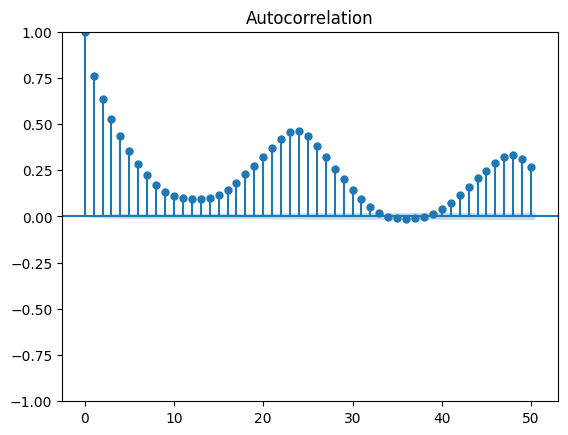

<Figure size 1000x500 with 0 Axes>

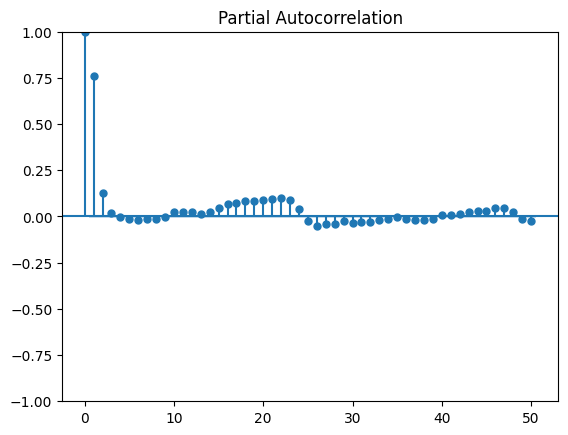

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Graficar ACF y PACF para la variable objetivo 'Velocidad'
plt.figure(figsize=(10,5))
plot_acf(Y, lags=50)  # Cambia 50 según cuántos lags quieras ver
plt.show()

plt.figure(figsize=(10,5))
plot_pacf(Y, lags=50)
plt.show()


Aplicamos la tecnica CCF para encontrar los mejores lags para las variables exogenas

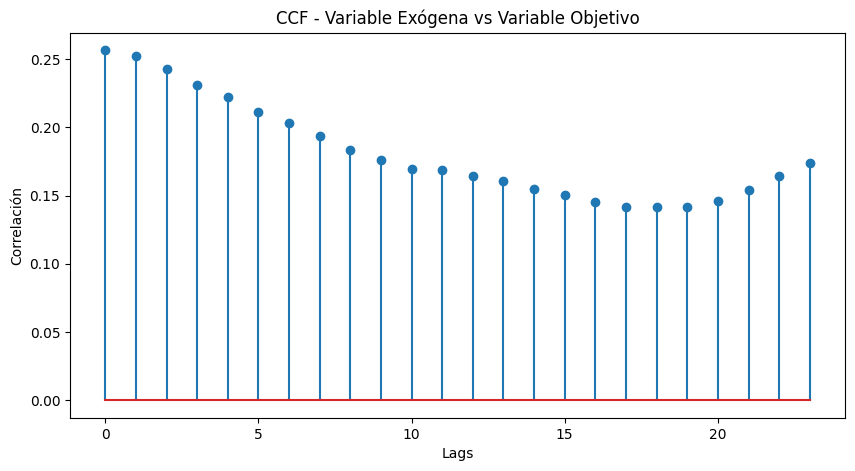

In [101]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Suponiendo que 'Y' es la variable objetivo y 'X_exogena' es la variable exógena

# Calcular Cross-Correlation Function (CCF)
cross_corr = ccf(Y, X['Direccion'])

# Graficar los primeros 20 lags
plt.figure(figsize=(10,5))
plt.stem(cross_corr[:24])
plt.title('CCF - Variable Exógena vs Variable Objetivo')
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.show()


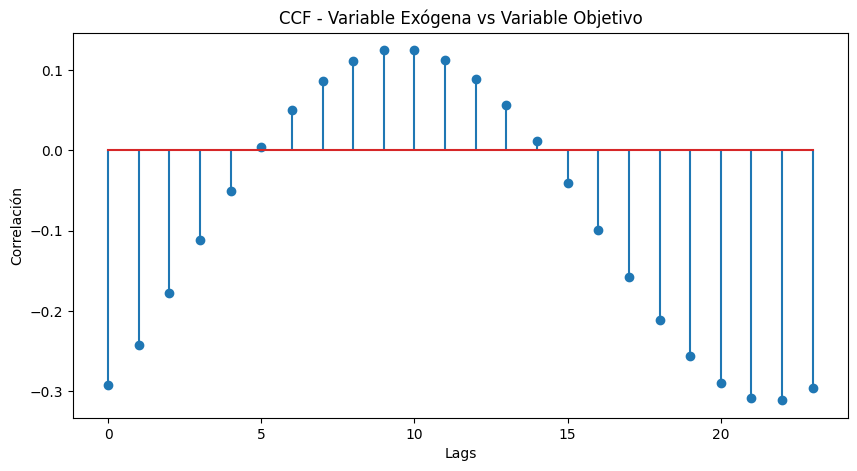

In [100]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Suponiendo que 'Y' es la variable objetivo y 'X_exogena' es la variable exógena

# Calcular Cross-Correlation Function (CCF)
cross_corr = ccf(Y, X['Humedad MN'])

# Graficar los primeros 20 lags
plt.figure(figsize=(10,5))
plt.stem(cross_corr[:24])
plt.title('CCF - Variable Exógena vs Variable Objetivo')
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.show()


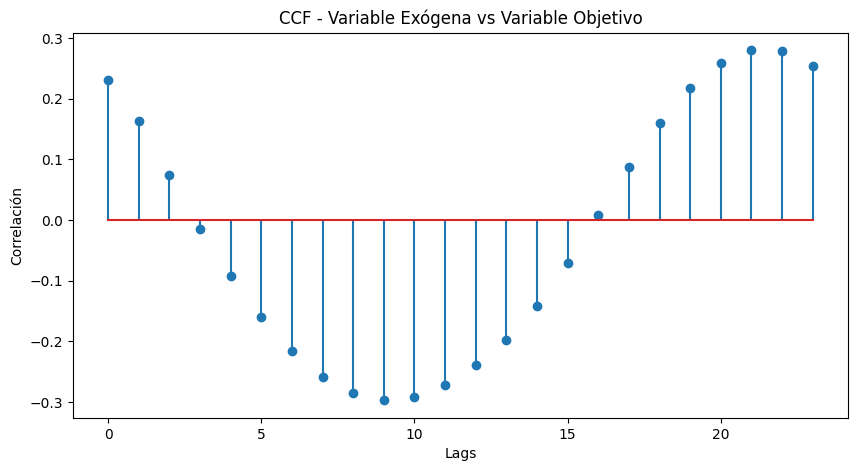

In [99]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Suponiendo que 'Y' es la variable objetivo y 'X_exogena' es la variable exógena

# Calcular Cross-Correlation Function (CCF)
cross_corr = ccf(Y, X['Temp MN'])

# Graficar los primeros 20 lags
plt.figure(figsize=(10,5))
plt.stem(cross_corr[:24])
plt.title('CCF - Variable Exógena vs Variable Objetivo')
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.show()


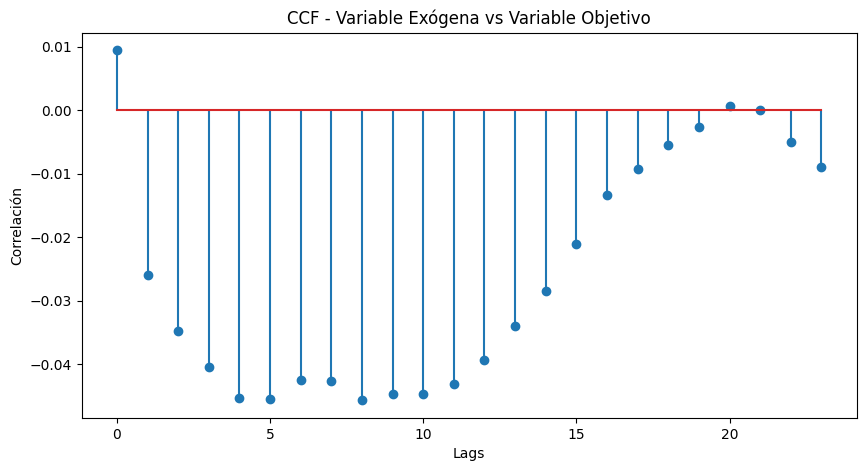

In [98]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Suponiendo que 'Y' es la variable objetivo y 'X_exogena' es la variable exógena

# Calcular Cross-Correlation Function (CCF)
cross_corr = ccf(Y, X['Precipitacion'])

# Graficar los primeros 20 lags
plt.figure(figsize=(10,5))
plt.stem(cross_corr[:24])
plt.title('CCF - Variable Exógena vs Variable Objetivo')
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.show()


In [25]:
import pandas as pd

# Suponiendo que tienes un DataFrame 'X' con las variables predictoras (Direccion, Humedad MN, Temp MN, Precipitacion)
# Y un DataFrame 'Y' con la variable objetivo

# Definir los lags que has seleccionado para cada variable
lags_dict = {
    'Direccion': [2, 3],        # Ejemplo: lags 2 y 4 para 'Direccion'
    'Humedad MN': [24, 23],       # Ejemplo: lags 1 y 3 para 'Humedad MN'
    'Temp MN': [9, 22],             # Ejemplo: lag 2 para 'Temp MN'
    'Precipitacion': [8]     # Ejemplo: lags 3 y 5 para 'Precipitacion'
}

# Crear un nuevo DataFrame para almacenar las variables con los lags
X_lagged = pd.DataFrame(index=X.index)

# Crear las columnas con los lags para cada variable
for variable, lags in lags_dict.items():
    for lag in lags:
        # Crear una nueva columna en X_lagged con el nombre del lag y aplicar shift
        X_lagged[f'{variable}_lag_{lag}'] = X[variable].shift(lag)

# Ahora, unimos las variables exógenas con la variable objetivo 'Y'
# 'Y' está en un DataFrame separado, así que lo concatenamos con 'X_lagged'
data_lagged = pd.concat([X_lagged, Y], axis=1)

# Eliminar las filas con valores NaN que se generaron por los lags
# Las primeras filas del DataFrame estarán vacías para algunos lags
data_lagged_clean = data_lagged.dropna()

# Mostrar el DataFrame final con los lags creados y las filas vacías eliminadas
print(data_lagged_clean.head())


    Direccion_lag_2  Direccion_lag_3  Humedad MN_lag_24  Humedad MN_lag_23  \
24         0.694658         0.707107               60.0               55.0   
25         0.629320         0.694658               55.0               50.0   
26         0.906308         0.629320               50.0               44.0   
27         0.866025         0.906308               44.0               43.0   
28         0.965926         0.866025               43.0               41.0   

    Temp MN_lag_9  Temp MN_lag_22  Precipitacion_lag_8  Velocidad  
24           18.7            24.3                  0.0        4.0  
25           18.6            25.0                  0.0        4.0  
26           18.2            25.5                  0.0        3.7  
27           18.1            25.9                  0.0        3.3  
28           17.6            26.8                  0.0        2.6  


In [26]:
data_lagged_clean.shape

(87669, 8)

In [27]:
# Guardar el DataFrame como un archivo Excel
data_lagged_clean.to_excel('datos_pf.xlsx', index=False)


Se guarda el dataset pre procesado listo para modelar